In [1]:
%matplotlib inline
import market
import metrics

from decimal import Decimal
import pandas
import seaborn

/Users/justus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


Text(0.5, 0.98, 'SWR vs PWR (60/40 portfolio)')

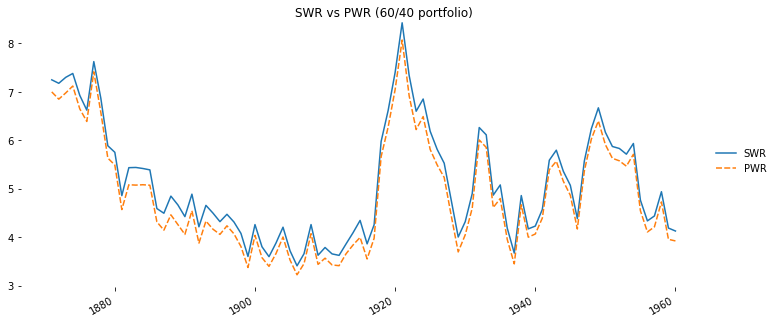

In [2]:
m = market.Returns_US_1871()
years = 60
start_year = 1871
last_year = 2019-years

def run(stock_pct, final=0):
    swrs = pandas.Series()
    for _ in range(last_year - start_year + 2):
        returns = []
        for one_year in zip(range(years), m.iter_from(start_year + _)):
            annual_returns = one_year[1]
            stocks = ((1+annual_returns.stocks) / (1+annual_returns.inflation)) - 1
            bonds = ((1+annual_returns.bonds) / (1+annual_returns.inflation)) - 1
            returns.append((stocks * stock_pct) + (bonds * (1-stock_pct)))
        swr = float(metrics.pwa(100, final, returns))
        swrs.loc[start_year+_] = swr
    return swrs

six_swr = run(Decimal('.6'))
six_pwr = run(Decimal('.6'), final=100)

g = seaborn.relplot(
    data=pandas.DataFrame({'SWR' : six_swr, 'PWR' : six_pwr}),
    kind='line',
    aspect=2,
    )
g.fig.autofmt_xdate()
g.despine(left=True, bottom=True, offset=20)
g.fig.suptitle('SWR vs PWR (60/40 portfolio)')

In [3]:
for i in range(0, 11):
    pwr = run(Decimal(i) / 10, final=100)
    print(i*10, pwr.min())

/Users/justus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


0 0.611767266751758
10 1.194717920671207
20 1.7339634014998668
30 2.2236088124747697
40 2.679832167636963
50 3.0583136192332026
60 3.2266053299568176
70 3.3470399260299266
80 3.4257367650821635
90 3.3826425249389933
100 3.1406293043650098


In [4]:
pwr_100 = run(Decimal(1))
pwr_80 = run(Decimal('.8'))
df = pandas.DataFrame({'100': pwr_100, '80': pwr_80})
df.head()

/Users/justus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


,100,80
1871,7.986643,7.671799
1872,7.610600,7.454823
1873,7.553684,7.495429
1874,7.986505,7.754001
1875,7.701544,7.383068


In [5]:
df[df['100'] < df['80']]

,100,80
1926,6.025129,6.130056
1927,5.612278,5.783616
1928,4.402148,4.763448
1929,3.270413,3.763872
1930,3.806183,4.220181
1931,5.132988,5.208644


In [6]:
six_swr.sort_values().head()

1906    3.411978
1902    3.600591
1899    3.604657
1912    3.627411
1909    3.630163
dtype: float64

In [7]:
six_pwr.sort_values().head()

1906    3.226605
1899    3.377111
1902    3.400732
1912    3.414388
1911    3.430058
dtype: float64

In [8]:
import scipy.stats
import simulate
import harvesting
import withdrawal

In [9]:
scipy.stats.percentileofscore(six_pwr, 2.5)

0.0

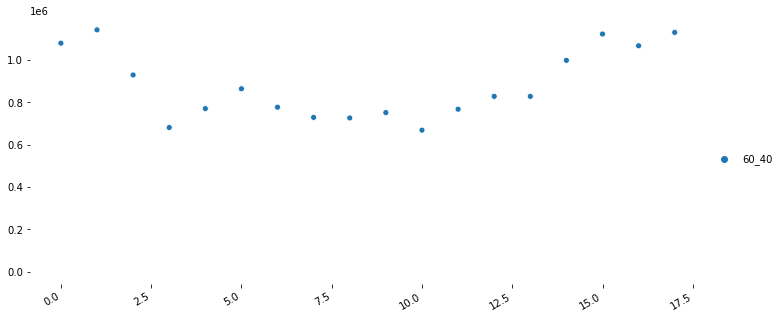

In [10]:
portfolio = (600000,400000)    
s = simulate.withdrawals(m.iter_from(1971),
                             withdraw=lambda p, s: withdrawal.ConstantDollar(p, s, rate=Decimal('0.025')),
                             years=18,
                             portfolio=portfolio,
                             harvesting=harvesting.make_rebalancer(0.6))
df = pandas.DataFrame({
    '60_40' : [x.portfolio_post.value_r for x in s],
})
g = seaborn.relplot(
        data=df,
        aspect=2,
    )
g.fig.autofmt_xdate()
g.despine(left=True, bottom=True, offset=20)

In [11]:
df['60_40'].sort_values().head()

10    668280.6818317775520474252354
3     680868.4147233067985984632514
8     725898.0441988942330368866472
7     728605.0318733318026494141881
9     751139.4444026294604626855526
Name: 60_40, dtype: object

In [12]:
six_pwr

1871    7.000833
1872    6.851424
1873    6.979859
1874    7.121997
1875    6.650519
          ...   
1956    4.110384
1957    4.215352
1958    4.729374
1959    3.958552
1960    3.925420
Length: 90, dtype: float64

In [13]:
pwr = six_pwr
for i in range(len(pwr)):
    pwr[i] = pwr[0:i].min()
pwr.head()

1871    7.000833
1872    6.851424
1873    6.979859
1874    7.121997
1875    6.650519
dtype: float64

180